<a href="https://colab.research.google.com/github/Men9UbilaMarka/GoogleColab/blob/main/PR18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №18

**Non Linear Regression Analysis**

1. Загружаем библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2. Визуализируем линейное уравнение

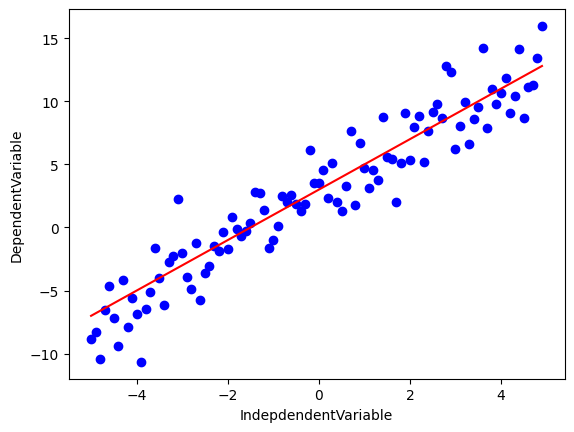

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
##Youcanadjusttheslopeandintercepttoverifythechangesinthegraph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure﴾figsize=﴾8,6﴿﴿
plt.plot(x, ydata,'bo')
plt.plot(x,y, 'r')
plt.ylabel('DependentVariable')
plt.xlabel('IndepdendentVariable')
plt.show()

3. Визуализируем кубическую функцию

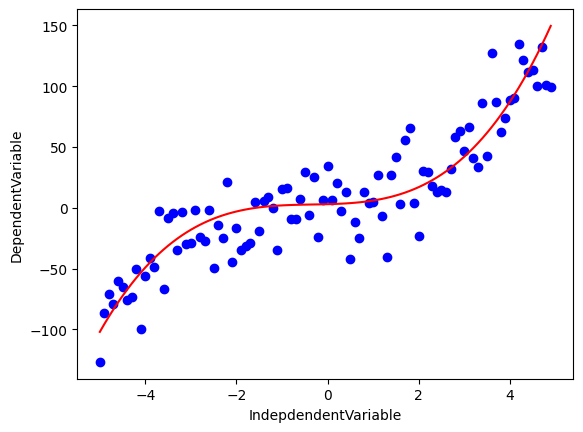

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
##Youcanadjusttheslopeandintercepttoverifythechangesinthegraph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,'bo')
plt.plot(x,y, 'r')
plt.ylabel('DependentVariable')
plt.xlabel('IndepdendentVariable')
plt.show()

4. Визуализируем квадратичную функцию

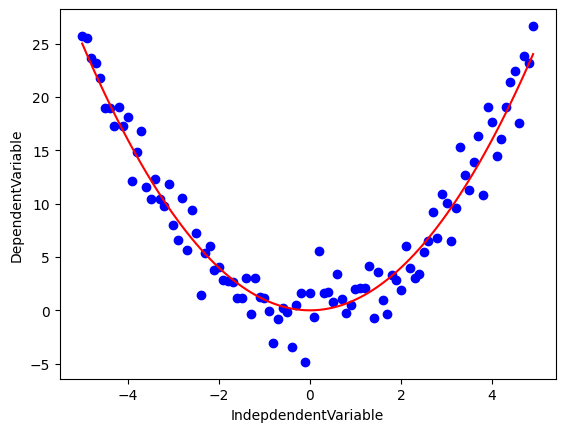

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
##Youcanadjusttheslopeandintercepttoverifythechangesinthegraph
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,'bo')
plt.plot(x,y, 'r')
plt.ylabel('DependentVariable')
plt.xlabel('IndepdendentVariable')
plt.show()

5. Визуализируем экспоненциальную функцию

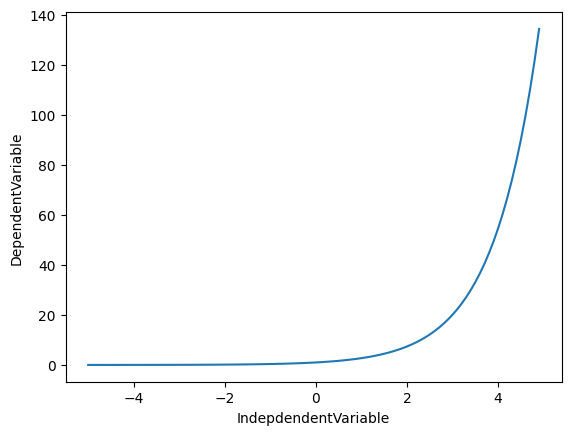

In [19]:
X = np.arange(-5.0, 5.0, 0.1)
##Youcanadjusttheslopeandintercepttoverifythechangesinthegraph
Y= np.exp(X)
plt.plot(X,Y)
plt.ylabel('DependentVariable')
plt.xlabel('IndepdendentVariable')
plt.show()

6. Визуализируем логарифмическую функцию

<ipython-input-7-012953e05fc4>:2: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


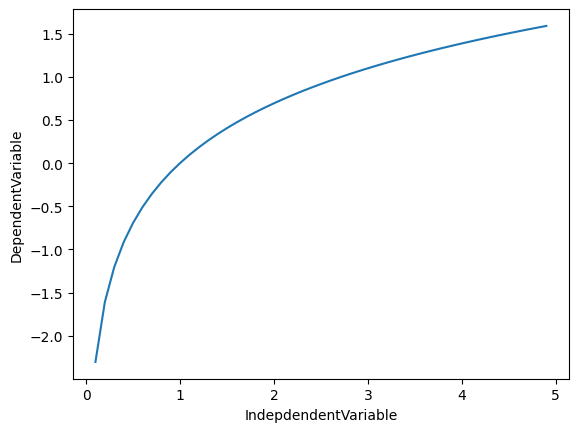

In [7]:
X = np.arange(-5.0, 5.0, 0.1)
Y = np.log(X)
plt.plot(X,Y)
plt.ylabel('DependentVariable')
plt.xlabel('IndepdendentVariable')
plt.show()

7. Визуализируем сигмоидальную/логистическую функцию

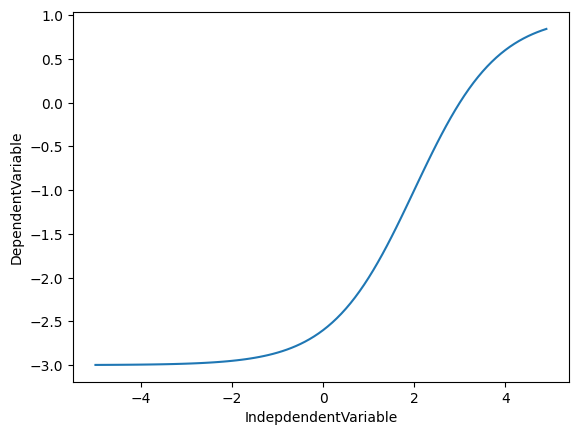

In [8]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1-4/(1+np.power(3, X-2))
plt.plot(X,Y)
plt.ylabel('DependentVariable')
plt.xlabel('IndepdendentVariable')
plt.show()

8. Загрузим датасет

In [9]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


9. Построим график отображения ВВП

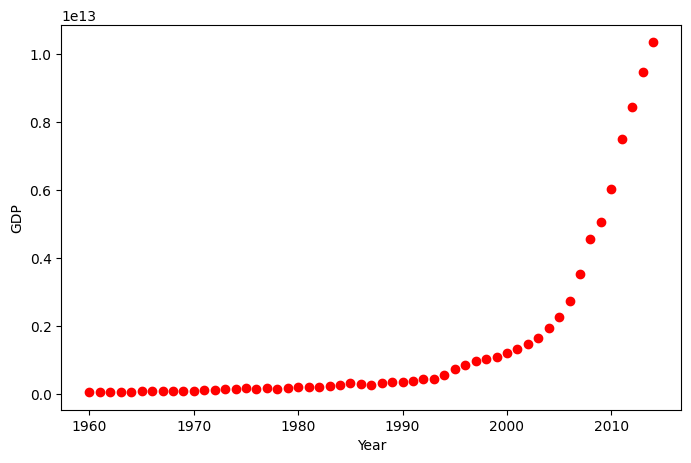

In [10]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

10. Построим логическую функцию для датасета

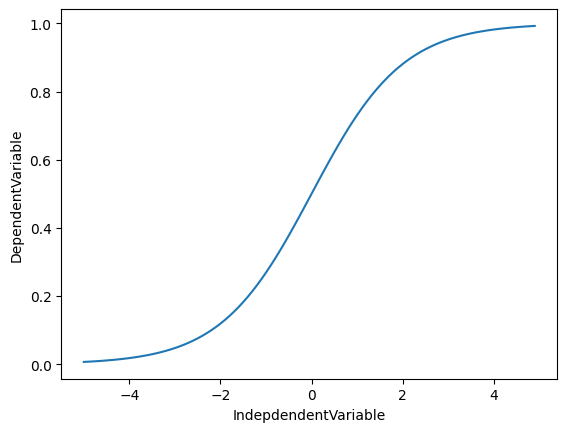

In [12]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))
plt.plot(X,Y)
plt.ylabel('DependentVariable')
plt.xlabel('IndepdendentVariable')
plt.show()

11. Создаем регрессивную модель и визуализируем ее с параметрами датасета

In [14]:
def sigmoid(x, Beta_1, Beta_2):
  y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
  return y

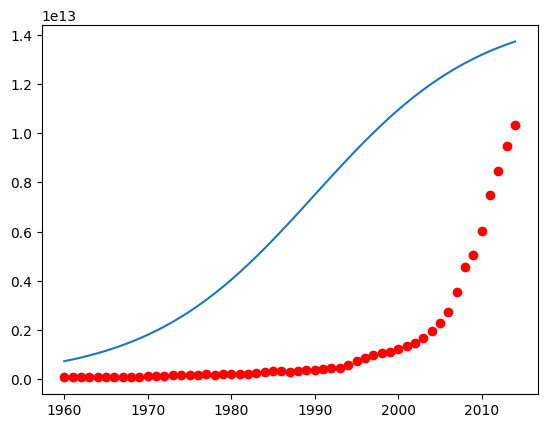

In [15]:
beta_1 = 0.10
beta_2 = 1990.0
#logisticfunction
Y_pred = sigmoid(x_data, beta_1 , beta_2)
#plotinitialpredictionagainstdatapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

12. Нормализуем х и у

In [16]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

13. Подключим необходимые библиотеки

In [17]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#printthefinalparameters
print("beta_1=%f,beta_2=%f" % (popt[0], popt[1]))

beta_1=690.451709,beta_2=0.997207


14. Объединяем модель и датасет

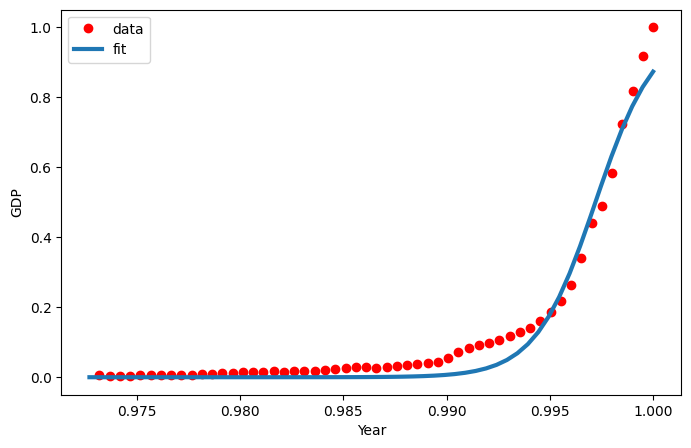

In [18]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

15. Рассчитаем точность

In [22]:
msk = np.random.rand (len (df)) < 0.8
train_x = xdata [msk]
test_x = xdata [~msk]
train_y = ydata [msk]
test_y = ydata [~msk]

popt, pcov = curve_fit (sigmoid, train_x, train_y)
y_hat = sigmoid(test_x, *popt)

print("Mean absolute error: %.2f" % np.mean (np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean(np.absolute(y_hat - test_y) ** 2))

from sklearn.metrics import r2_score
print ("R2-score: %.2f" % r2_score(y_hat, test_y))

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.97


**Вывод :** в данной практической работе была разработана модель на основе нелинейной регрессии. Она используется, когда отношения между переменными нелинейная. В контексте данной практической была разработана модель, доказывающая изменение ВВП Китая. Так как ВВП росло по экспоненте, невозможно бы было использовать линейные методы построения модели.